In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import numpy as np
from tkinter import Tk
from tkinter.filedialog import askdirectory
path = askdirectory(title='Select Folder') # shows dialog box and return the path
os.path.abspath(path)
files = glob.glob(os.path.join(path, "*.csv"))
path1 = os.path.basename(os.path.normpath(path))

dataframe_list = []
#note, for naming. The file (aggregate freq/amp, waveform) data should be pretty concise. The waveform by itself should be named plainly (like 0.5) because it will be in its own folder and analyzed
#waveform data should be aggregated together (like ratio) and put into one folder for the entire system. 
for path, dirs, files in os.walk(path):
    print("Path:", path)

    print ("\nDirs:")
    for d in dirs:
        print ('\t'+d)

    
        
    print ("\nFiles:")  


    for f in files:
        
        #filename = os.path.basename(f).split('.')[0] + "." + os.path.basename(f).split('.')[1]
        #strain = filename.split('-')[0].replace("%","")
        
        if(f.endswith('.csv')) :
            
            #NEED A WAY TO GET FREQUENCY
            fullfile = path +"/" +f#+".csv"
            if(fullfile.endswith('.csv')):
                pass
            else:
                fullfile += ".csv"
            fullfile = path +"/" +f#+".csv"
            print(fullfile)
            #data splitting
            name_data = f.split('_')
            if(len(name_data) == 4):
                wt_percent = int(name_data[0][0])
                replicate = int(name_data[1])
                raw_strain = float(name_data[2].replace(".csv", "").replace("xyz","0.1").replace("strain","").replace("_save", ""))
            else:
                wt_percent = int(name_data[0][0])
                replicate = 1
                raw_strain = float(name_data[1].replace(".csv", "").replace("xyz","0.1").replace("strain","").replace("_save", ""))
            
            
           #opendataframe
        
            dataframe1 = pd.read_csv(fullfile)
            dataframe1["strain"] = raw_strain
            dataframe1["wt_percent"] = wt_percent
            
            dataframe_list.append(dataframe1)
            print(dataframe1.size)
            
            
            

            
            #plotData(data1,name, n)
           
                


    
        
        
        
        
    print("Finished for loop")
       

        
        
    print ("----")
full_df = pd.concat(dataframe_list).reset_index()
full_df2 = full_df.copy()
print(full_df)


Path: C:/Users/Himendra Perera/Documents/ProjectCode/CO2Diff/ConfocalShearAnalysis/data/AmplitudeSweeps/Data/alt

Dirs:

Files:
C:/Users/Himendra Perera/Documents/ProjectCode/CO2Diff/ConfocalShearAnalysis/data/AmplitudeSweeps/Data/alt/1cda_2_1000strain_save.csv
15264
C:/Users/Himendra Perera/Documents/ProjectCode/CO2Diff/ConfocalShearAnalysis/data/AmplitudeSweeps/Data/alt/1cda_2_100strain_save.csv
13368
C:/Users/Himendra Perera/Documents/ProjectCode/CO2Diff/ConfocalShearAnalysis/data/AmplitudeSweeps/Data/alt/1cda_2_10strain_save.csv
15048
C:/Users/Himendra Perera/Documents/ProjectCode/CO2Diff/ConfocalShearAnalysis/data/AmplitudeSweeps/Data/alt/1cda_2_1strain_save.csv
15288
C:/Users/Himendra Perera/Documents/ProjectCode/CO2Diff/ConfocalShearAnalysis/data/AmplitudeSweeps/Data/alt/1cda_2_200strain_save.csv
13168
C:/Users/Himendra Perera/Documents/ProjectCode/CO2Diff/ConfocalShearAnalysis/data/AmplitudeSweeps/Data/alt/1cda_2_20strain_save.csv
15864
C:/Users/Himendra Perera/Documents/Projec

   strain  radius_bin  index_sum  Unnamed: 0_sum  radius_sum       x_sum  \
0     0.1  [0.0, 0.5)        169             274    0.352216  158.853237   
1     0.1  [0.5, 1.0)          0               0    0.000000    0.000000   
2     0.1  [1.0, 1.5)          0               0    0.000000    0.000000   
3     0.1  [1.5, 2.0)       1408            2199    5.187080  496.520795   
4     0.1  [2.0, 2.5)       1345            1857    2.104316  170.994784   

        y_sum       z_sum  neighbors_sum  wt_percent_sum  ...   index_mean  \
0  266.949031   62.977751              1               1  ...   169.000000   
1    0.000000    0.000000              0               0  ...          NaN   
2    0.000000    0.000000              0               0  ...          NaN   
3  511.588240  314.601544              1               3  ...   469.333333   
4   92.044823  123.963112              0               4  ...  1345.000000   

   Unnamed: 0_mean  radius_mean      x_mean      y_mean      z_mean  \
0  

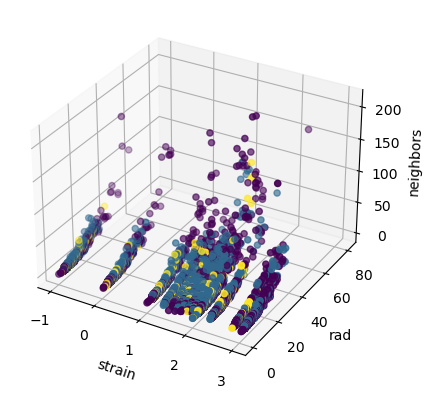

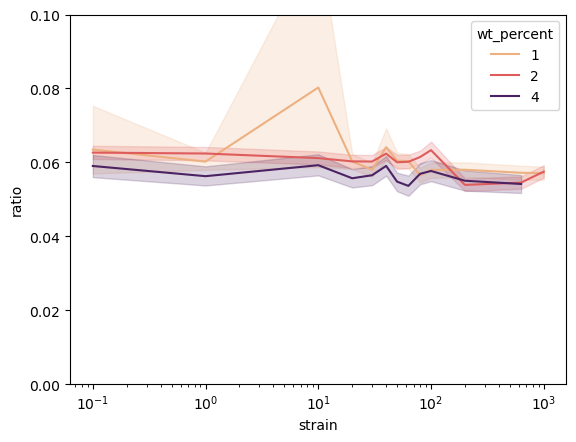

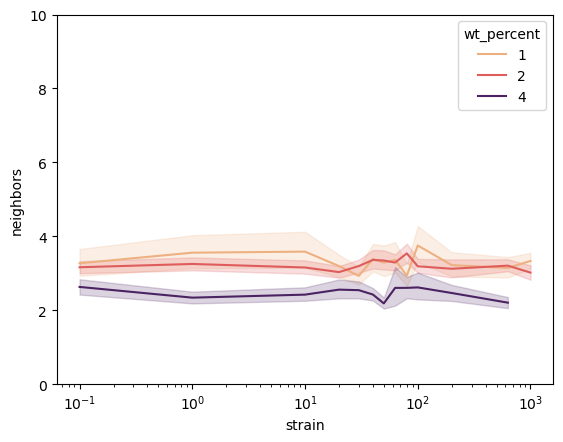

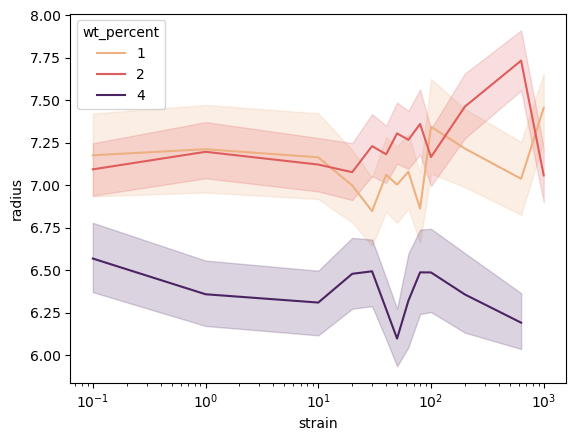

In [11]:
import matplotlib.colors as mcolors
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
#wt_percent = 4
full_df = full_df2.copy()
full_df = full_df[full_df["strain"]>0]
full_df = full_df[full_df["x"]<300]
full_df = full_df[full_df["x"]>50]

full_df = full_df[full_df["y"]<300]
full_df = full_df[full_df["y"]>50 ]

full_df = full_df[full_df["z"]>50]
full_df = full_df[full_df["z"]<150]

full_df = full_df[full_df["radius"]<100]
full_df = full_df[full_df["radius"]>0]


#full_df = full_df[full_df["wt_percent"]==wt_percent]
full_df['logradius'] = np.log10(full_df['radius'])
full_df['volume'] = 3.14*full_df['radius']**2 


strains = full_df['strain'].unique()
wt_percent = full_df['wt_percent'].unique()

for wt in wt_percent:
    for strain in strains:
        break
        full_df1 = full_df[full_df["strain"]==strain]

        a1 = sns.histplot(data = full_df1, x = "radius", bins = 30)
        a1.set(xlim = (0,60), ylim=(0,600))
        plt.savefig("./data/AmplitudeSweeps/Figures/"+str(wt)+"wtpercent"+str(strain)+"strain"+".png")

        #plt.show()
        #full_df1.to_csv("./data/AmplitudeSweeps/Data/"+"histdata"+str(strain)+"wtpercent"+ str(wt)+".csv")

    
    
# Create bins with a specified width
bin_width = 0.5
# Calculate the maximum bin edge as the nearest upper multiple of bin_width
max_bin_edge = np.ceil(full_df['radius'].max() / bin_width) * bin_width
# Create an array of bin edges from 0 to max_bin_edge with a step of bin_width
bins = np.arange(0, max_bin_edge + bin_width, bin_width)

# Bin the data using pd.cut
full_df['radius_bin'] = pd.cut(full_df['radius'], bins=bins, include_lowest=True, right=False)

# Calculate summary statistics for each bin
summary_data = full_df.groupby([ "strain",'radius_bin']).sum().reset_index()
summary_data_2 = full_df.groupby([ "strain",'radius_bin']).mean().reset_index()  

# Rename columns in summary_data to append '_sum'
summary_data = summary_data.rename(columns={col: f'{col}_sum' for col in summary_data.columns if col not in ['strain', 'radius_bin']})

# Rename columns in summary_data_2 to append '_mean'
summary_data_2 = summary_data_2.rename(columns={col: f'{col}_mean' for col in summary_data_2.columns if col not in ['strain', 'radius_bin']})

# Step 2: Merge DataFrames on 'radius_bin'
combined_data = pd.merge(summary_data, summary_data_2,on=['strain', 'radius_bin'])

print(combined_data.head())
combined_data = combined_data.dropna()
combined_data['radius_mean'] = pd.to_numeric(combined_data['radius_mean'], errors='coerce')
combined_data['radius_mean'].fillna(0, inplace=True)
combined_data['radius_mean'] = combined_data['radius_mean'].astype(float)

combined_data["normalizedVolume"] = combined_data["volume_sum"]/(201*350*350)*100
combined_data['radius_mean'] = np.round(combined_data['radius_mean'],1)


#combined_data["radius_mean"] = float(combined_data["radius_mean"])
    
strains = combined_data['strain'].unique()
for wt in wt_percent:

    for strain in strains:
        print(strain)
        break
        combined_data1 = combined_data[combined_data["strain"]==strain]
        #combined_data1 = combined_data1[combined_data1["wt_percent"]==wt]
        

        a1 = sns.barplot(data = combined_data1, x = "radius_mean", y = "normalizedVolume")


        a1.set(xlim = (0,90), ylim = (0,0.35))
        # Select every Nth label to display
        n = 10  # Adjust based on your needs
        for index, label in enumerate(a1.xaxis.get_ticklabels()):
            if index % n != 0:
                label.set_visible(False)
        a1.set(xlabel ="Radius [micron]", ylabel = "Normalized Volume [-]")
        plt.tight_layout()
        plt.savefig("./data/AmplitudeSweeps/Figures/"+"hist"+str(strain)+"wtpercent-"+str(wt)+".png")
        plt.clf()
        #plt.show()    

        combined_data1.to_csv("./data/AmplitudeSweeps/Data/"+"histdata"+str(strain)+"wtpercent"+ str(wt)+".csv")
    
    
    
    
    
    
    
    
    
    
    
    



full_df['logstrain'] = np.log10(full_df['strain'])


print(full_df)


fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(full_df["logstrain"] , full_df["radius"], full_df["neighbors"] , c = full_df["wt_percent"])

#X, Y = np.meshgrid(x_range, y_range)
#Z = Model.ev(X,Y)
#ax.plot_surface(X,Y,Z, color='red', alpha=0.5)

ax.set_xlabel('strain')
ax.set_ylabel('rad')
ax.set_zlabel('neighbors')
plt.show()

full_df["ratio"] = full_df["neighbors"]/full_df["radius"]**2
a1 = sns.lineplot(data = full_df, x = "strain", y = "ratio",  hue = "wt_percent",palette = "flare")
a1.set(xscale='log')
a1.set(ylim = (0,0.1))



plt.show()

a1 = sns.lineplot(data = full_df, x = "strain", y = "neighbors",  hue = "wt_percent",palette = "flare")
a1.set(xscale='log')
a1.set(ylim = (0,10))

plt.savefig("neighbors.png", format = 'png', dpi = 800)
plt.show()

a1 = sns.lineplot(data = full_df, x = "strain", y = "radius",  hue = "wt_percent",palette = "flare")
a1.set(xscale='log')



plt.show()


